In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import json
import seaborn as sns

In [3]:
folder_path="/content/drive/MyDrive/NYUSH study/Fall 2023/AD research/"
# read raw gaze data
with open(folder_path+"expt _1_session_2_Raw_Gaze_Data(2).txt") as file_gaze:
  file_gaze_content = file_gaze.read()
data_gaze = json.loads(file_gaze_content)
data_gaze=pd.DataFrame(data_gaze)
print(data_gaze)

# read response time data

with open(folder_path+"expt _1_session_2_Response_Time(2).txt") as file_response:
  file_response_content = file_response.read()
  file_response_content = file_response_content.split('\n')
data_response = json.loads(file_response_content[0])
data_response=pd.DataFrame(data_response).T
print(data_response)
data_distraction=json.loads(file_response_content[-1])
data_distraction=dict(data_distraction)
data_distraction=pd.DataFrame.from_dict([data_distraction])
print(data_distraction)

# read random element data
with open(folder_path+"expt 1 session 7 - Random Elements.txt") as file_element:
  file_element_content = file_element.read()
data_element = json.loads(file_element_content)
data_element=data_element["response"]
data_element=pd.DataFrame(data_element)
data_element

       x    y  value           time
0    753  509   1191  1700672476595
1    738  505     69  1700672476652
2    724  502     64  1700672476714
3    713  500     54  1700672476766
4    703  497     62  1700672476829
..   ...  ...    ...            ...
933  898  730    160  1700672601892
934  763  714    160  1700672602052
935  778  710    161  1700672602214
936  806  722    161  1700672602374
937  828  722    161  1700672602534

[938 rows x 4 columns]
      Time    Evaluation
0    81950  Correct Pass
1     1054  Correct Pass
2     1099  Correct Pass
3     1135  Correct Pass
4     1139  Correct Pass
..     ...           ...
116   1122  Correct Pass
117   1119  Correct Pass
118   1129  Correct Pass
119   1129  Correct Pass
120   1125  Correct Pass

[121 rows x 2 columns]
       startTime        endTime  yawn  sneeze  sing
0  1700672477844  1700672602550     0       0     0


,shape,color,prevShape,prevColor,nextShape,nextColor
0,Diamond,#ee27f5,,,Triangle,#FFFFFF
1,Triangle,#FFFFFF,Diamond,#ee27f5,Diamond,#db9914
2,Diamond,#db9914,Triangle,#FFFFFF,Rectangle,#db9914
3,Rectangle,#db9914,Diamond,#db9914,Triangle,#f5da69
4,Triangle,#f5da69,Rectangle,#db9914,Diamond,#FFFFFF
...,...,...,...,...,...,...
115,Circle,#db9914,Rectangle,#FFFFFF,Diamond,#ee27f5
116,Diamond,#ee27f5,Circle,#db9914,Circle,#db9914
117,Circle,#db9914,Diamond,#ee27f5,Circle,#db9914
118,Circle,#db9914,Circle,#db9914,Rectangle,#f5da69


In [4]:
# count how many incorrect actions
count_incorrect_pass = data_response["Evaluation"].value_counts().get('Incorrect Pass', 0)
count_incorrect_click = data_response["Evaluation"].value_counts().get('Incorrect Click', 0)
count_incorrect=count_incorrect_pass+count_incorrect_click
print(count_incorrect)

# can calculate the rate of incorrect and decide a threshold for compensating
# sample code
if count_incorrect <12:
  print("performance good")
else:
  print("performance bad")

1
performance good


<Axes: xlabel='value', ylabel='Count'>

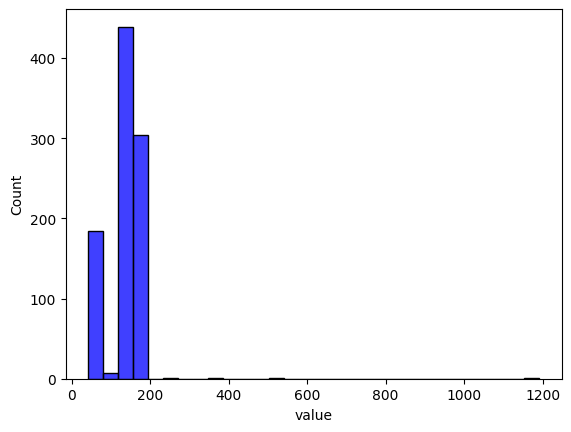

In [5]:
# histogram for duration of each gaze
# may help us to know the distraction of the participant
sns.histplot(data_gaze['value'], bins=30, kde=False, color='blue', edgecolor='black')

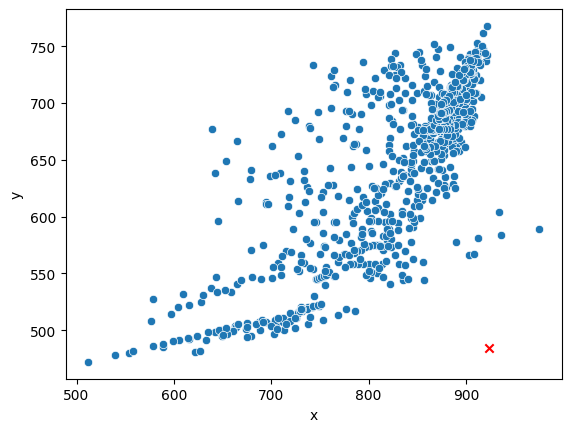

In [10]:
sns.scatterplot(x=data_gaze['x'],y=data_gaze["y"])
import matplotlib.pyplot as plt
# add the central point
plt.scatter(924, 484, color='red', marker='x')
# thinking of getting a range of the center of the x and y so that we can count how many times people looking for somewhere else
# we can further know the percentange of looking at elsewhere
# and based on the timestamp recorded in distraction, we can calculate the times they look at elsewhere during distraction and then compare
# compare the percentage of elsewhere eye gaze when distraction happens, even we can identify which distraction affect most

## something not sure
1. maybe we can check which shape/color has the most incorrect rate
2. check the duration when they look at somewhere else, and compare different condition with no distraction/distraction, with adhd/non-adhd